# First computer exercise in Machine Learning: Unsupervised methods
==============================================================================================================


## Part A: Principal Component Analysis

Write a function that performs PCA on a (not necessarily centered) data in a 2D numpy array. The function should return the pca transformed data along with the eigenvalues and eigenvectors of the tranformation. You can use the numpy package. 

In [1]:
import numpy as np
# Use the numpy eigenvalue solver for the covariance matrix
E, V = np.linalg.eig(np.array([[0,2], [1, 1]]))
# The solver doesn't return ordered eigenvalues, so we have to fix this
key = np.argsort(E)[::-1]
V = V[:,key]
E = E[key]
print(E)
print(V)

[ 2. -1.]
[[-0.70710678 -0.89442719]
 [-0.70710678  0.4472136 ]]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("ini_data/ini_data.zip", 'r')
zip_ref.extractall("../lotsofspace/")
zip_ref.close()

In [3]:
# delete me: https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python
# XXX: I don't think that it's pythonic to have capital letters in function names
def PCA2(data, pca_components=2):
    """
    PCA with eigenvalues
    
    :param data: A 2d numpy array where data.shape == (number_of_data_points, dimensionality_of_data_points)
    :returns: tuple (U, E, V) 
        WHERE
        U is a numpy array of the pca transformed data
        E is an descending numpy array of eigenvalues
        V is an numpy array of eigenvectors such that eigenvalue E[i] corresponds to V[i,:]
    """
    ### YOUR CODE STARTS HERE ###
    
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = np.linalg.eig(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    E = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    V = evecs[:, :pca_components]
    U = np.dot(V.T, data.T).T
    V = np.transpose(V)
    ### YOUR CODE ENDS HERE ###
    return (U, E, V)

We will begin with the MNIST data set https://en.wikipedia.org/wiki/MNIST_database. It is commonly used for "hello world" purposes in machine learning.

The shape of the data vector XX is: (1797, 64)
The shape of the label vector YY is: (1797,)


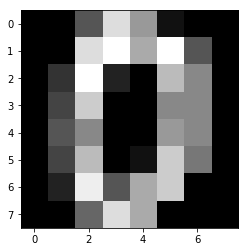

In [4]:
import matplotlib.pyplot as plt 
from course_utils import *

#  The images have been scaled down to 8x8 pixels, and will be stored in a flat numpy vector. 
XX, YY = load_mnist_data()
print("The shape of the data vector XX is: {}".format(XX.shape))
print("The shape of the label vector YY is: {}" .format(YY.shape))
# Display a sample
plt.imshow(np.reshape(XX[0,:], (8, 8)), cmap="gray")
plt.show()

Check that your function outputs a solution that agrees with the canonical python implementation of PCA

In [5]:
# XXX: I can just do this for randn_data like I do below for K-Means, it's weird to introduce MNIST before testing PCA

In [6]:
from sklearn.decomposition import PCA
(U, E, V) = PCA2(XX, 2)
pca = PCA(n_components=2)
pca.fit(XX)
if np.transpose(V).shape == pca.components_.shape:
    print("Try transposing your eigenvector output")
assert(np.allclose([1, 1], np.abs(np.diagonal(np.inner(V, pca.components_)))))
print("Passed")

Passed


In [7]:
X, Y = load_ini_data2(duckdns=True)
clusters = len(np.unique(Y))

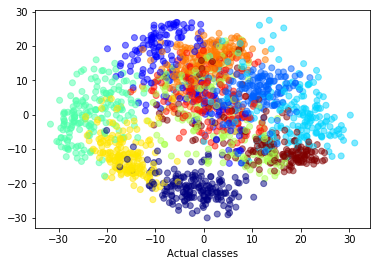

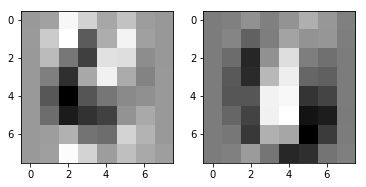

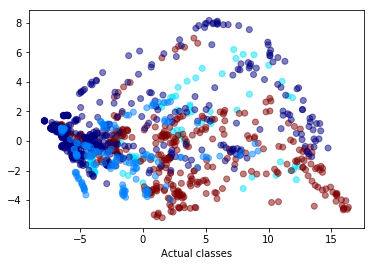

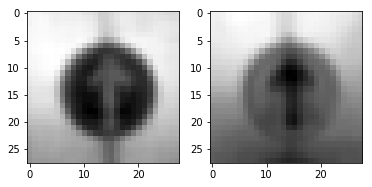

In [8]:
# Viz with 2 pca components
pca_features, _, _ = PCA2(XX, 2)
plt.xlabel('Actual classes')
plt.scatter(pca_features[:,0], pca_features[:,1], c=YY, alpha=0.5, cmap="jet")
plt.show()
for i in range(2):
    plt.subplot(1, 2, i+1)
    comp_image = np.reshape(V[i,:], (8,8))
    plt.imshow(comp_image, cmap="gray")
plt.show()
pca_features, _, V = PCA2(X, 2)
plt.xlabel('Actual classes')
plt.scatter(pca_features[:,0], pca_features[:,1], c=Y, alpha=0.5, cmap="jet")
plt.show()
for i in range(2):
    plt.subplot(1, 2, i+1)
    comp_image = np.reshape(V[i,:], (28, 28))
    plt.imshow(comp_image, cmap="gray")
plt.show()


## Part B: Whitening
Use your PCA implemention to complete this whitening function.

In [9]:
from sklearn.decomposition import PCA #XX: Delete me before course###

def whiten(data):
    """
    K-Means Clustering

    :param data: A 2d numpy array of where data.shape == (number_of_data_points,
                 dimensionality_of_data_points), assume that the data is centered
    :returns: tuple (whitened_data, whitening_matrix) 
        WHERE
        whitened_data is the transformed input data whose covariance is the identity matrix
        whitening_matrix is the transformation that yields the whitening: 
                         np.dot(whitening_matrix, data.T) == whitened_data.T
    """

    ### YOUR CODE STARTS HERE ###
    X = np.array(data)
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    (U, E, V) = PCA2(X, X.shape[1])
    Lambda = np.zeros((len(pca.singular_values_), len(pca.singular_values_)))
    np.fill_diagonal(Lambda, np.power(E, -0.5))
    X = np.dot(np.dot(Lambda, V), X.T)
    whitened_data = X
    whitening_matrix = np.dot(Lambda, V)
    ### YOUR CODE ENDS HERE ###
    
    return (whitened_data, whitening_matrix)

See if the function returns whitened data

In [10]:
import numpy as np###
rnd_data = np.random.multivariate_normal([0, 0], [[3, 4], [5, 6]], 1000)
print(rnd_data.shape)
whitened_data, whitening_matrix = whiten(rnd_data)
assert(np.allclose(np.identity(2), np.cov(whitened_data)))
print("Passed")

(1000, 2)
Passed


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


Check whether the original data can be approximately recovered:

In [11]:
inverse_whitening = np.linalg.inv(whitening_matrix)###
recovered_data = np.dot(inverse_whitening, whitened_data)
if recovered_data.shape != rnd_data.shape:
    recovered_data = recovered_data.T
assert(np.allclose(rnd_data, recovered_data, atol=0.1))
print("Passed")

Passed


Inspect the effect of whitening

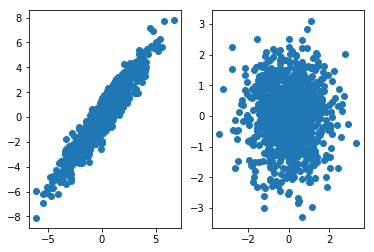

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.subplot(1, 2, 1)
plt.scatter(rnd_data[:,0], rnd_data[:,1])
if rnd_data.shape != whitened_data.shape:
    whitened_data = whitened_data.T
plt.subplot(1, 2, 2)
plt.scatter(whitened_data[:,0], whitened_data[:,1])
plt.show()

## Part C: Slow Feature Analysis

Use your PCA and whitening functions to implement SFA.

In [13]:
def slow_feature_analysis(data, n_features):
    """
    Slow Feature Analysis
    
    :param data: A numpy array where data.shape == (number_of_data_points, dimensionality_of_data_points)
    :param n_features: The number of slowest features to calculate for each point
    
    :returns sfa_transformed_data: An array of the sfa transformed data with shape (data.shape[0], n_features)
    """
    ### YOUR CODE STARTS HERE ###
    whitened_data, _ = whiten(data)
    whitened_data = whitened_data.T
    derivative = lambda Z: Z[1:, :]-Z[:-1, :]
    whitened_derivatives = derivative(whitened_data)
    (U, E, V) = PCA2(whitened_derivatives, data.shape[1])
    sfa_transformed_data = whitened_data.dot(V)
    sfa_transformed_data = np.fliplr(sfa_transformed_data)
    ### YOUR CODE ENDS HERE ###
    return sfa_transformed_data

See if your function agrees with the standard implementation:

In [16]:
import mdp
sfa_dims = 2
sfa = mdp.nodes.SFANode(output_dim=sfa_dims)
rnd_data = np.random.multivariate_normal([0, 0], [[3, 4], [5, 6]], 1000)
try:
    assert(np.allclose(slow_feature_analysis(rnd_data, sfa_dims), sfa.execute(rnd_data), atol=1e-1))
except:
    assert(np.allclose(-1*slow_feature_analysis(rnd_data, sfa_dims), sfa.execute(rnd_data), atol=1e-1))
print("Passed")

Passed


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


(1107, 784)


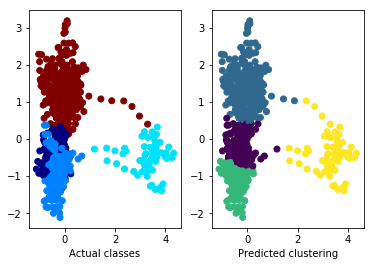

In [17]:
# Viz with 2 sfa features
# TODO: Swap out the KMeans function calls with Kmeans2
from sklearn.cluster import KMeans
import mdp
print(X.shape)
sfa = mdp.nodes.SFANode(output_dim=2)
slow_features = sfa.execute(X)
# slow_features = > function from assignment 5 <  
kmeans = KMeans(init='random', n_clusters=clusters)
kmeans.fit(slow_features)
classes = kmeans.predict(slow_features)
# classes = > function from assignment 3 <  

plt.subplot(1, 2, 1)
plt.scatter(slow_features[:,0], slow_features[:,1], c=Y, cmap="jet")
plt.xlabel("Actual classes")
plt.subplot(1, 2, 2)

plt.scatter(slow_features[:,0], slow_features[:,1], c=classes)
plt.xlabel("Predicted clustering")
plt.show()

## Part D: K-Means clustering
Complete this function that calculates the reconstruction error of a clustering assignment according to the lecture notes.


In [18]:
def KM_error(data, centroids, assignment):
    """
    K-Means error
    
    :param data: A 2D numpy array where data.shape == (number_of_data_points, dimensionality_of_data)
    :param centroids: A 2D numpy array where centroids.shape == (n_clusters, dimensionality_of_data)
    :param assignment: A list defining the allocation of the data to clusters such that data[i,:] belongs to
                       cluster assignment[i], corresponding to centroids[clustering[i]]
                       assume that the cluster labels are integers in 0, ..., n_clusters
    
    :returns total_error: The reconstruction error of the clustering (eq. 1 lecture notes on clustering)
    """
    ### YOUR CODE STARTS HERE ###
    total_error = 0
    for i in range(data.shape[0]):
        total_error += np.linalg.norm(data[i,:]   -   centroids[assignment[i]])**2
    ### YOUR CODE ENDS HERE ###
    return total_error 

Test KM_error, there should be no error when you run the cell below.

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=5)
rnd_data = np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], 100)
kmeans.fit(rnd_data)
assert(np.allclose(kmeans.inertia_, KM_error(rnd_data, kmeans.cluster_centers_, kmeans.labels_)))
print("Passed")

Passed


Now write a function that calculates the optimal choice of cluster centers:

In [20]:
def KM_centers(data, assignment, n_clusters):
    """
    K-Means centroids
    
    :param data: A 2D numpy array where data.shape == (number_of_data_points, dimensionality_of_data)
    :param assignment: A list defining the allocation of the data to clusters such that data[i,:] belongs to
                       cluster assignment[i]
                       assume that the cluster labels are integers in 0, ..., n_clusters
    :param n_clusters: the upper bound on the values that the elements in assignment can take
    
    :returns centroids: A 2D numpy array where centroids.shape == (n_clusters, dimensionality_of_data),
                        calculated according to eq. 2 in the lecture notes on clustering
    
    """
    ### YOUR CODE STARTS HERE ###
    centroids = np.zeros((n_clusters, data.shape[1]))
    N = np.zeros(n_clusters)
    for i in range(len(N)):
        N[i] = np.sum(1 for j in assignment if j == i)
    for i in range(data.shape[0]):
        centroids[assignment[i]] += data[i,:]
    for i in range(n_clusters):
        for j in range(data.shape[1]):
            centroids[i,j]/=N[i] 
    ### YOUR CODE ENDS HERE ###
    return centroids


Test KM_centers:

In [21]:
kmeans = KMeans(init='random', n_clusters=5)
rnd_data = np.random.multivariate_normal([0,0], [[1, 0], [0, 1]], 100)
kmeans.fit(rnd_data)
assert(np.allclose(kmeans.cluster_centers_, KM_centers(rnd_data, kmeans.labels_, 5)))
print("Passed")

Passed


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.


Write a k-means clustering algorithm that gets a numpy array of data, along with a number $k$ of clusters and a convergence threshold. Use the functions you wrote above and choose the initial center locations randomly from the data points.

In [22]:
import numpy as np
def Kmeans2(data, n_clusters, threshold):
    """
    K-Means Clustering
    
    :param data: A 2d numpy array where data.shape == (number_of_data_points, dimensionality_of_data_points)
    :param n_clusters: The number of clusters the algorithm finds
    :param threshold: The minimum change in eq. 1 (lecture notes on clustering) before algorithm stops 
    :returns assignment: a list of class assignments such that point data[i,:] belongs to cluster assignment[i]
    """
    
    ### YOUR CODE STARTS HERE ###
        
    ### YOUR CODE ENDS HERE ###
    return assignment

## Bonus: Cluster scoring

In [23]:
# Same as above, but now with SFA features. 
# Here they should find that all metrics are significantly better
# with a good number of SFA features: turns out that exploiting
# the knowledge that the data is ordered is pretty useful.
from time import time
from sklearn import metrics

sfa_features = [2, 5, 10, 20, 50, 99]
for features in sfa_features:  
    t0 = time()
    sfa = mdp.nodes.SFANode(output_dim=features)
    slow_features = sfa.execute(X)
    # slow_features = > function from assignment 5 <  
    kmeans = KMeans(init='random', n_clusters=clusters)
    kmeans.fit(slow_features)
    classes = kmeans.predict(slow_features)
    # classes = > function from assignment 3 <  
    print("{} sfa components, Purity: {:.2}, ARI: {:.2}, Seconds: {:.2} ".format(features,
                                             purity_score(Y, classes),
                                             metrics.adjusted_rand_score(Y, classes),
                                                              time() - t0))
    
t0 = time()
kmeans = KMeans(init='random', n_clusters=clusters)
kmeans.fit(X)
classes = kmeans.predict(X)
# classes = > function from assignment 3 <  

print("raw pixels\t , Purity: {:.2}, ARI: {:.2}, Seconds: {:.2}".format(purity_score(Y, classes),
                                    metrics.adjusted_rand_score(Y, classes),
                                    time() - t0))


2 sfa components, Purity: 0.84, ARI: 0.56, Seconds: 0.22 
5 sfa components, Purity: 0.97, ARI: 0.92, Seconds: 0.24 
10 sfa components, Purity: 0.84, ARI: 0.71, Seconds: 0.62 
20 sfa components, Purity: 0.79, ARI: 0.61, Seconds: 0.63 
50 sfa components, Purity: 0.64, ARI: 0.28, Seconds: 0.38 
99 sfa components, Purity: 0.49, ARI: 0.054, Seconds: 0.27 
raw pixels	 , Purity: 0.59, ARI: 0.16, Seconds: 0.57


In [24]:
# Possible functions for students to implement:
# purity_score(y_true, y_predicted), davies_bouldin_score(X, y_predicted)